In [20]:
import numpy as np
import matplotlib.pyplot as plt

def diff_bar(data, vmin=0, vmax=2):
    #  グリッド毎にabs(実際のlabelデータ - 予測結果)を400個棒グラフにして出力する
    fig = plt.figure()
    ax = plt.subplot()
    pixcel = np.arange(len(data))
    ax.bar(pixcel, data, color='magenta', label="svd")
    ax.set_ylim(vmin, vmax)
    plt.xlabel("grid number")
    plt.ylabel("mean absolute error")
    plt.legend()
    plt.show()

In [18]:
import pickle

# データセットのロード
# y_val
mode = 10
testdir = '/docker/mnt/d/research/D2/cnn3/test'
val_path = testdir + '/continuous/seed1_predictors_coarse_std_Apr_msot-pr_1x1_std_MJJASO_thailand.pickle'
with open(val_path, 'rb') as f:
    data = pickle.load(f)
y_val, val_dct = data['y_val'], data['val_dct']
val_model, val_year = val_dct['model'], val_dct['year'] # validationモデルと年のdict

# pred_val
pred_path = f"/docker/mnt/d/research/D2/cnn3/result/svd/thailand/1x1/seed1_mode{mode}.npy"
pred_val = np.load(pred_path)

# pred_val_norm, y_val_norm
pred_norm_path = f"/docker/mnt/d/research/D2/cnn3/result/svd/thailand/1x1/seed1_mode{mode}_norm.pickle"
with open(pred_norm_path, 'rb') as f:
    data = pickle.load(f)
pred_val_norm, y_val_norm = data['pred_val_norm'], data['y_val_norm']

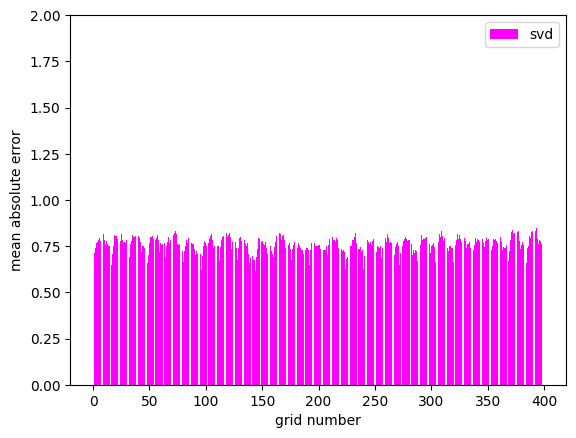

In [22]:
diff = np.abs(pred_val - y_val) #  (1000, 400)
diff_mean = np.mean(diff, axis=0)
diff_bar(diff_mean)

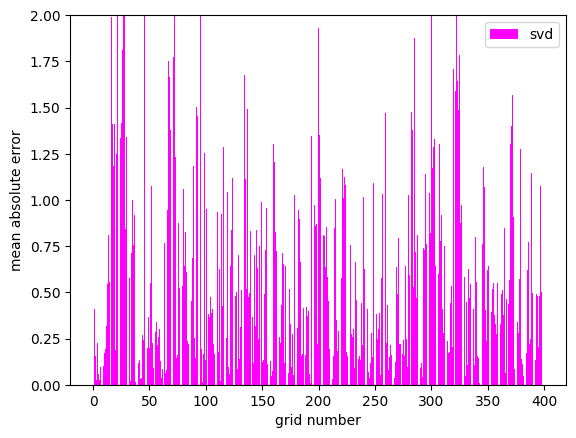

In [23]:
diff_ind = np.abs(pred_val[0] - y_val[0]) #  (1000, 400)
diff_bar(diff_ind)